In [3]:
import pandas as pd
import altair as alt

### 1. Load Titanic dataset

In [4]:
titanic_df = pd.read_csv("../data/titanic.csv")

In [5]:
titanic_df = titanic_df.fillna("None")
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.338,B5,S,2,None,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,None,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,None,None,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,None,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,None,None,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,None,C,None,328,None
1305,3,0,"Zabour, Miss. Thamine",female,None,1,0,2665,14.4542,None,C,None,None,None
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,None,C,None,304,None
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,None,C,None,None,None


### 2. Cabin coordinates

In [57]:
cabin_locations = {"A36": (350, 1.0), "A37": (350, 6.0), "A32": (400, 6.0), "A30": (400, 5.0), "A31": (400, 2.0), "A33": (400, 1.0), "A28": (405, 6.0), "A26": (405, 5.0), "A27": (405, 2.0),
                       "A29": (405, 1.0), "A34": (395, 6.0), "A35": (395, 1.0), "A24": (410, 6.0), "A22": (410, 5.0), "A23": (410, 2.0), "A25": (410, 1.0), "A20": (415, 6.0), "A18": (415, 5.0),
                       "A19": (415, 2.0), "A21": (415, 1.0), "A16": (420, 6.0), "A14": (420, 5.0), "A15": (420, 2.0), "A17": (420, 1.0), "A12": (425, 6.0), "A10": (425, 5.0), "A9":  (425, 2.0),
                       "A11": (425, 1.0), "A8": ( 430, 6.0),  "A6": (430, 5.0), "A5":  (430, 2.0), "A7":  (430, 1.0), "A4":  (435, 6.0), "A2":  (435, 4.0), "A1":  (435, 3.0), "A3":  (435, 1.0),
                       
                       "B90": (345, 6.0), "B94": (340, 6.0), "B96": (335, 6.0), "B98": (330, 6.0), "B92": (345, 5.0), "B91": (345, 1.0), "B101": (395, 3.0), "B102": (395, 4.0), "B100": (385, 4.0),
                       "B99": (385, 3.0), "B58": (400, 6.0), "B88": (350, 6.0), "B84": (355, 6.0), "B86": (355, 5.0), "B85": (355, 1.0), "B82": (360, 6.0), "B78": (365, 6.0), "B76": (370, 6.0),
                       "B72": (375, 6.0), "B70": (380, 6.0), "B66": (385, 6.0), "B64": (390, 6.0), "B60": (395, 6.0), "B80": (365, 5.0), "B74": (375, 5.0), "B68": (385, 5.0), "B62":  (395, 5.0),
                       "B79": (365, 1.0), "B73": (375, 1.0), "B67": (385, 1.0), "B52": (405, 5.0), "B51": (405, 1.0), "B61":  (395, 1.0)}

cabin_locations_df = pd.DataFrame(cabin_locations).T
cabin_locations_df.index.names = ["cabin"]
cabin_locations_df.columns = ["cabin_x", "cabin_y"]
cabin_locations_df.head()

,cabin_x,cabin_y
cabin,,
A36,350.0,1.0
A37,350.0,6.0
A32,400.0,6.0
A30,400.0,5.0
A31,400.0,2.0


#### 2.1 Mapping cabin coordinates to titanic data frame

In [197]:
titanic_df_with_cabin_coords = pd.merge(titanic_df, cabin_locations_df, left_on = "cabin", right_on = "cabin")
titanic_df_with_cabin_coords["deck"] = titanic_df_with_cabin_coords["cabin"].apply(lambda x: x[0])
titanic_passengers_by_cabin = titanic_df_with_cabin_coords.set_index(["cabin","name"]).sort_index()
titanic_passengers_by_cabin["survived"] = titanic_passengers_by_cabin["survived"].map({0:"Passenger Died", 1:"Passenger Survived"})
titanic_passengers_by_cabin

,,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,cabin_x,cabin_y,deck
cabin,name,,,,,,,,,,,,,,,
A10,"Ross, Mr. John Hugo",1,Passenger Died,male,36,0,0,13049,40.125,C,None,None,"Winnipeg, MB",425.0,5.0,A
A11,"Rosenbaum, Miss. Edith Louise",1,Passenger Survived,female,33,0,0,PC 17613,27.7208,C,11,None,"Paris, France",425.0,1.0,A
A14,"Clifford, Mr. George Quincy",1,Passenger Died,male,None,0,0,110465,52,S,None,None,"Stoughton, MA",420.0,5.0,A
A16,"Duff Gordon, Lady. (Lucille Christiana Sutherland) (""Mrs Morgan"")",1,Passenger Survived,female,48,1,0,11755,39.6,C,1,None,London / Paris,420.0,6.0,A
A18,"Dulles, Mr. William Crothers",1,Passenger Died,male,39,0,0,PC 17580,29.7,C,None,133,"Philadelphia, PA",415.0,5.0,A
A19,"Smith, Mr. Richard William",1,Passenger Died,male,None,0,0,113056,26,S,None,None,"Streatham, Surrey",415.0,2.0,A
A20,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",1,Passenger Survived,male,49,1,0,PC 17485,56.9292,C,1,None,London / Paris,415.0,6.0,A
A21,"Brady, Mr. John Bertram",1,Passenger Died,male,41,0,0,113054,30.5,S,None,None,"Pomeroy, WA",415.0,1.0,A
A23,"Barkworth, Mr. Algernon Henry Wilson",1,Passenger Survived,male,80,0,0,27042,30,S,B,None,"Hessle, Yorks",410.0,2.0,A


In [8]:
for cabins in titanic_passengers_by_cabin.index.levels[0]:
    if titanic_passengers_by_cabin.loc[cabins].shape[0] > 1:
        i=0
        passengers = list(titanic_passengers_by_cabin.loc[cabins].index)
        for passenger in passengers:
            if i==0:
                shift_x = 1
                shift_y = 0.25
            if i==1:
                shift_x = -1
                shift_y = 0.25
            if i==2:
                shift_x = -1
                shift_y = -0.25
            if i==3:
                shift_x = 1
                shift_y = -0.25

            titanic_passengers_by_cabin.loc[cabins].at[passenger, "cabin_x"] = float(titanic_passengers_by_cabin.loc[cabins].at[passenger, "cabin_x"]) + shift_x
            titanic_passengers_by_cabin.loc[cabins].at[passenger, "cabin_y"] = float(titanic_passengers_by_cabin.loc[cabins].at[passenger, "cabin_y"]) + shift_y
            i+=1
            
titanic_passengers_by_cabin.reset_index("name")

,name,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,cabin_x,cabin_y
cabin,,,,,,,,,,,,,,,
A10,"Ross, Mr. John Hugo",1,0,male,36,0,0,13049,40.125,C,None,None,"Winnipeg, MB",425.0,5.00
A11,"Rosenbaum, Miss. Edith Louise",1,1,female,33,0,0,PC 17613,27.7208,C,11,None,"Paris, France",425.0,1.00
A14,"Clifford, Mr. George Quincy",1,0,male,None,0,0,110465,52,S,None,None,"Stoughton, MA",420.0,5.00
A16,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",1,1,female,48,1,0,11755,39.6,C,1,None,London / Paris,420.0,6.00
A18,"Dulles, Mr. William Crothers",1,0,male,39,0,0,PC 17580,29.7,C,None,133,"Philadelphia, PA",415.0,5.00
A19,"Smith, Mr. Richard William",1,0,male,None,0,0,113056,26,S,None,None,"Streatham, Surrey",415.0,2.00
A20,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",1,1,male,49,1,0,PC 17485,56.9292,C,1,None,London / Paris,415.0,6.00
A21,"Brady, Mr. John Bertram",1,0,male,41,0,0,113054,30.5,S,None,None,"Pomeroy, WA",415.0,1.00
A23,"Barkworth, Mr. Algernon Henry Wilson",1,1,male,80,0,0,27042,30,S,B,None,"Hessle, Yorks",410.0,2.00


### 3. Ship outline

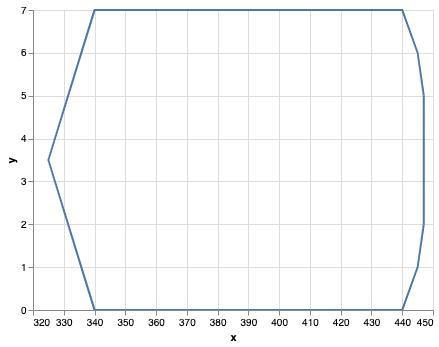

In [21]:
ship_outline_1 = pd.DataFrame({"x" : [325,340, 440, 445, 447],
                               "y" : [3.5, 7, 7, 6, 5]})

ship_outline_2 = pd.DataFrame({"x" : [325,340, 440, 445, 447],
                              "y" :  [3.5, 0, 0, 1, 2]})

ship_outline_3 = pd.DataFrame({"x" : [447,447],
                              "y" :  [2, 5]})

chart_ship_outline_1 = alt.Chart(ship_outline_1).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q')
)
chart_ship_outline_2 = alt.Chart(ship_outline_2).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q')
)
chart_ship_outline_3 = alt.Chart(ship_outline_3).mark_line().encode(
    alt.X('x:Q'),
    alt.Y('y:Q')
)
chart_ship_outline = chart_ship_outline_1 + chart_ship_outline_2 + chart_ship_outline_3
chart_ship_outline

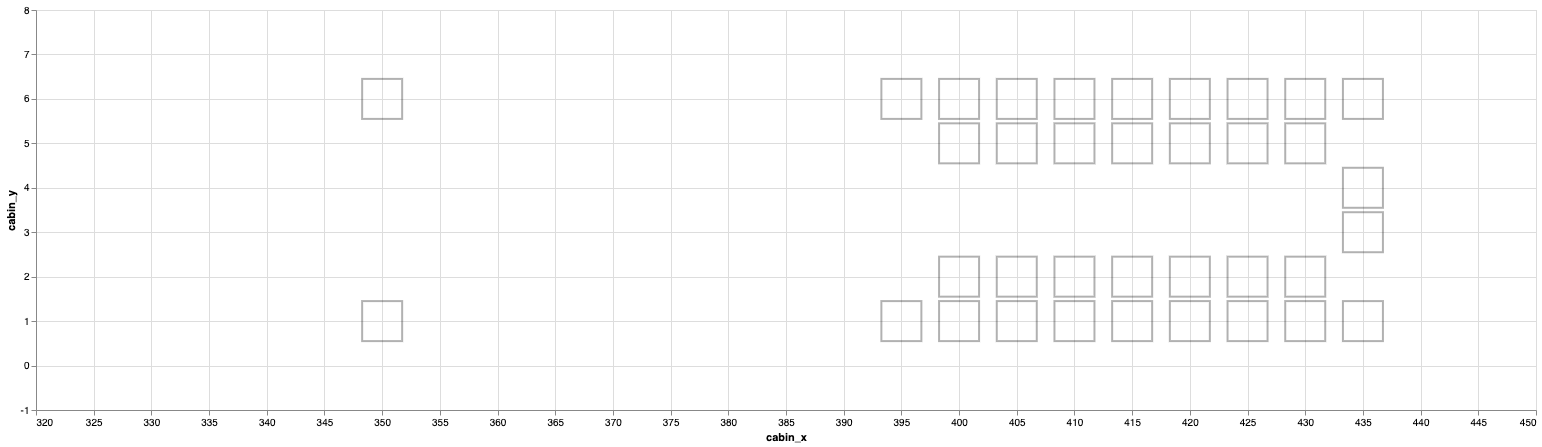

In [22]:
cabin_plot = alt.Chart(cabin_locations_df).mark_square(size = 1600, fill = "None", stroke = "black", opacity = 0.3).encode(
    alt.X('cabin_x:Q', scale=alt.Scale(domain = [320,450])),
    alt.Y('cabin_y:Q', scale=alt.Scale(domain = [-1,7.5]))
).properties(width = 1500, height = 400)
cabin_plot

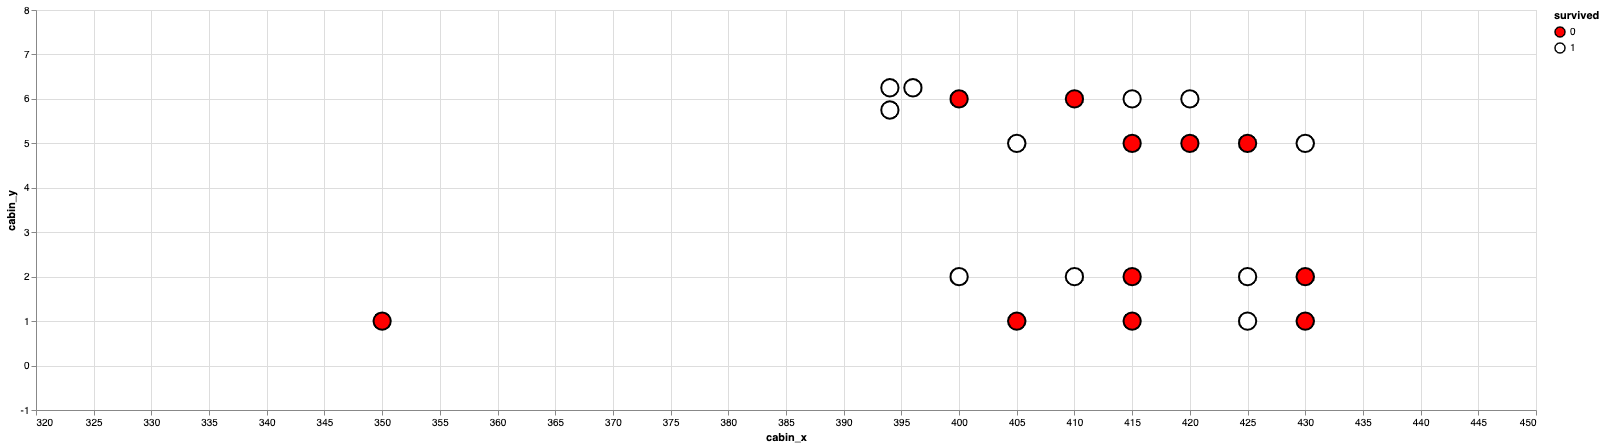

In [16]:
passenger_plot = alt.Chart(titanic_passengers_by_cabin.reset_index("name")).mark_point(size = 300, stroke = "black", filled = True, opacity = 1).encode(
    alt.X('cabin_x:Q', scale=alt.Scale(domain = [320,450])),
    alt.Y('cabin_y:Q', scale=alt.Scale(domain = [-1,7.5])),
    alt.Color('survived:N', scale=alt.Scale(range = ['red','white']))
).properties(width = 1500, height = 400)

passenger_plot

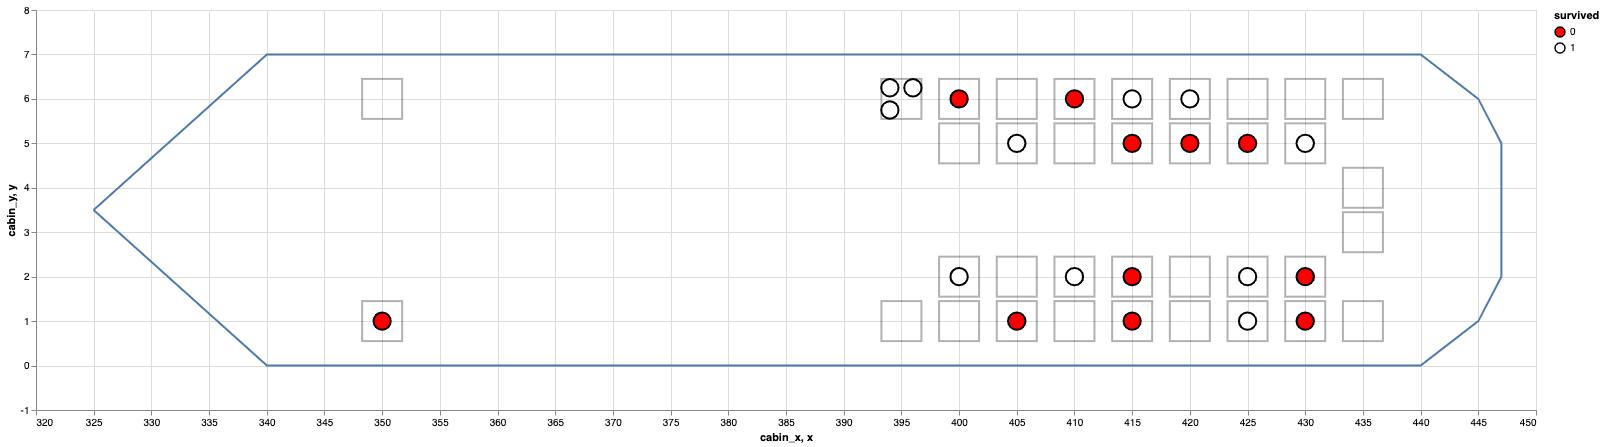

In [23]:
cabin_plot + passenger_plot + chart_ship_outline

## 4. Wrapping everything in the `make_titanic_plot` function

In [208]:
def make_titanic_plot(deck_level):
    titanic_df = pd.read_csv("../data/titanic.csv").fillna("None")
    
    cabin_locations = {"A36": (350, 1.0), "A37": (350, 6.0), "A32": (400, 6.0), "A30": (400, 5.0), "A31": (400, 2.0), "A33": (400, 1.0), "A28": (405, 6.0), "A26": (405, 5.0), "A27": (405, 2.0),
                       "A29": (405, 1.0), "A34": (395, 6.0), "A35": (395, 1.0), "A24": (410, 6.0), "A22": (410, 5.0), "A23": (410, 2.0), "A25": (410, 1.0), "A20": (415, 6.0), "A18": (415, 5.0),
                       "A19": (415, 2.0), "A21": (415, 1.0), "A16": (420, 6.0), "A14": (420, 5.0), "A15": (420, 2.0), "A17": (420, 1.0), "A12": (425, 6.0), "A10": (425, 5.0), "A9":  (425, 2.0),
                       "A11": (425, 1.0), "A8": ( 430, 6.0),  "A6": (430, 5.0), "A5":  (430, 2.0), "A7":  (430, 1.0), "A4":  (435, 6.0), "A2":  (435, 4.0), "A1":  (435, 3.0), "A3":  (435, 1.0),
                       
                       "B90": (345, 6.0), "B94": (340, 6.0), "B96": (335, 6.0), "B98": (330, 6.0), "B92": (345, 5.0), "B91": (345, 1.0), "B101": (395, 3.0), "B102": (395, 4.0), "B100": (385, 4.0),
                       "B99": (385, 3.0), "B58": (400, 6.0), "B88": (350, 6.0), "B84": (355, 6.0), "B86": (355, 5.0), "B85": (355, 1.0), "B82": (360, 6.0), "B78": (365, 6.0), "B76": (370, 6.0),
                       "B72": (375, 6.0), "B70": (380, 6.0), "B66": (385, 6.0), "B64": (390, 6.0), "B60": (395, 6.0), "B80": (365, 5.0), "B74": (375, 5.0), "B68": (385, 5.0), "B62":  (395, 5.0),
                       "B79": (365, 1.0), "B73": (375, 1.0), "B67": (385, 1.0), "B52": (405, 5.0), "B51": (405, 1.0), "B61":  (395, 1.0), "B48": (425, 6.0), "B46": (425, 5.0), "B47": (425, 2.0),
                       "B49": (425, 1.0), "B44": (430, 6.0), "B42": (430, 5.0), "B43": (430, 2.0), "B45": (430, 1.0), "B40":  (435, 6.0), "B38": (435, 5.0), "B37": (435, 2.0), "B39": (435, 1.0),
                       "B34": (440, 6.0), "B32": (440, 5.0), "B30": (440, 4.0), "B31": (440, 3.0), "B33": (440, 2.0), "B35":  (440, 1.0), "B28": (445, 6.0), "B26": (445, 5.0), "B24": (445, 4.0),
                       "B25": (445, 3.0), "B27": (445, 2.0), "B29": (445, 1.0), "B22": (450, 6.0), "B20": (450, 5.0), "B18":  (450, 4.0), "B19": (450, 3.0), "B21": (450, 2.0), "B23": (450, 1.0),
                       "B16": (455, 6.0), "B14": (455, 5.0), "B12": (455, 4.0), "B11": (455, 3.0), "B15": (455, 2.0), "B17":  (455, 1.0), "B10": (460, 5.0), "B8": (460, 4.0), "B7": (460, 3.0),
                       "B9": (460, 2.0),  "B6": (465, 6.0), "B4":  (465, 5.0), "B3": (465, 4.0), "B1": (465, 3.0), "B3": (465, 2.0), "B5": (465, 1.0)}
                       

    cabin_locations_df = pd.DataFrame(cabin_locations).T.reset_index()
    cabin_locations_df["deck"] = cabin_locations_df["index"].apply(lambda x: x[0])
    cabin_locations_df = cabin_locations_df.set_index(["deck", "index"])
    cabin_locations_df.index.names = ["deck", "cabin"]
    cabin_locations_df.columns = ["cabin_x", "cabin_y"]
    
    titanic_df_with_cabin_coords = pd.merge(titanic_df, cabin_locations_df, left_on = "cabin", right_on = "cabin")
    titanic_df_with_cabin_coords["deck"] = titanic_df_with_cabin_coords["cabin"].apply(lambda x: x[0])
    titanic_passengers_by_cabin = titanic_df_with_cabin_coords.set_index(["cabin","name"]).sort_index()
    
    for cabins in titanic_passengers_by_cabin.index.levels[0]:
        if titanic_passengers_by_cabin.loc[cabins].shape[0] > 1:
            i=0
            passengers = list(titanic_passengers_by_cabin.loc[cabins].index)
            for passenger in passengers:
                if i==0:
                    shift_x = 1
                    shift_y = 0.25
                if i==1:
                    shift_x = -1
                    shift_y = 0.25
                if i==2:
                    shift_x = -1
                    shift_y = -0.25
                if i==3:
                    shift_x = 1
                    shift_y = -0.25

                titanic_passengers_by_cabin.loc[cabins].at[passenger, "cabin_x"] = float(titanic_passengers_by_cabin.loc[cabins].at[passenger, "cabin_x"]) + shift_x
                titanic_passengers_by_cabin.loc[cabins].at[passenger, "cabin_y"] = float(titanic_passengers_by_cabin.loc[cabins].at[passenger, "cabin_y"]) + shift_y
                i+=1
    
    ship_outline_1 = pd.DataFrame({"x" : [305, 325, 470, 475, 477], "y" : [3.5, 7, 7, 6, 5]})
    ship_outline_2 = pd.DataFrame({"x" : [305, 325, 470, 475, 477], "y" :  [3.5, 0, 0, 1, 2]})
    ship_outline_3 = pd.DataFrame({"x" : [477,477], "y" :  [2, 5]})

    chart_ship_outline_1 = alt.Chart(ship_outline_1).mark_line().encode(
        alt.X('x:Q'),
        alt.Y('y:Q')
    )
    chart_ship_outline_2 = alt.Chart(ship_outline_2).mark_line().encode(
        alt.X('x:Q'),
        alt.Y('y:Q')
    )
    chart_ship_outline_3 = alt.Chart(ship_outline_3).mark_line().encode(
        alt.X('x:Q'),
        alt.Y('y:Q')
    )
    chart_ship_outline = chart_ship_outline_1 + chart_ship_outline_2 + chart_ship_outline_3
    
    cabin_plot = alt.Chart(cabin_locations_df.loc[deck_level]).mark_square(size = 1400, fill = "None", stroke = "black", opacity = 0.3).encode(
        alt.X('cabin_x:Q', title = "", scale=alt.Scale(domain = [300,450])),
        alt.Y('cabin_y:Q', title = "", scale=alt.Scale(domain = [-1,7.5]))
    ).properties(width = 1500, height = 400)
    titanic_passengers_by_cabin = titanic_passengers_by_cabin.reset_index().set_index(["deck","cabin"])
    titanic_passengers_by_cabin["survived"] = titanic_passengers_by_cabin["survived"].map({0:"Passenger Died", 1:"Passenger Survived"})
    
    passenger_plot = alt.Chart(titanic_passengers_by_cabin.loc[deck_level]).mark_point(size = 250, stroke = "black", filled = True, opacity = 1).encode(
        alt.X('cabin_x:Q', scale=alt.Scale(domain = [300,450])),
        alt.Y('cabin_y:Q', scale=alt.Scale(domain = [-1,7.5])),
        alt.Color('survived:N', scale=alt.Scale(range = ['red','white']), legend = alt.Legend(titleFontSize = 0, labelFontSize = 17)),
        tooltip=['name:N', 'sex:N', 'age:O']
    ).properties(width = 1500, height = 400, title = "Fate of titanic passengers by cabin location on deck {}".format(deck_level))
    
    full_plot = (cabin_plot + passenger_plot + chart_ship_outline
                ).configure_title(fontSize = 20)
    
    return full_plot

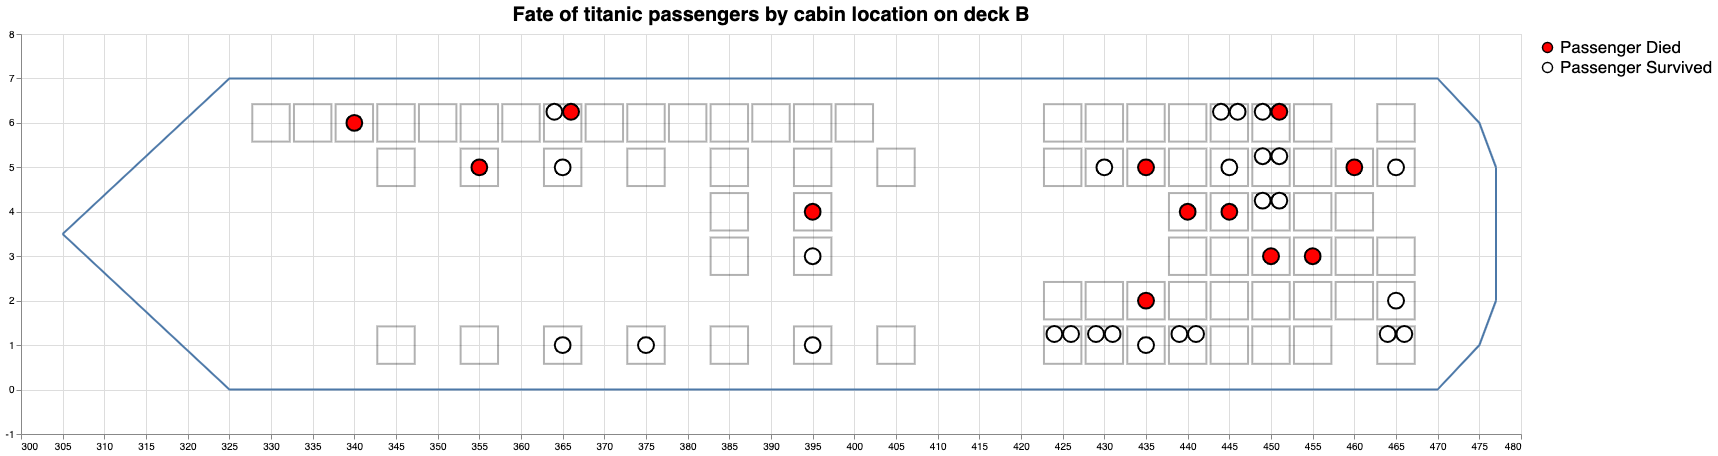

In [209]:
make_titanic_plot("B")